ANALISIS EXPLORATORIO DE LOS DATOS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Previamente los archivos de credits y movies_dataset se han unido, eliminando las columnas y elementos vacios para generar el documento dataset.csv, ese documento cuenta con todas las columnas necesarias para generar tando el modelo de recomendacion como los endpoints de la api, a continuacion de desarrola el EDA paso a paso para determinar las columnas a usar dentro del modelo de recomendacion.

In [2]:
#Cargamos el archivo con la informacion necesaria
df=pd.read_csv('dataset.csv')

Se examina la informacion del dataset y el tipo de datos que maneja 

In [9]:
print("-"*100)
print(f"Dimensiones del dataset: \n {df.shape}")
print("-"*100)
print(f"Primeras filas del dataset: \n {df.head()} \n")
print("-"*100)
print(f"Tipos de datos del dataset: \n {df.dtypes}")

----------------------------------------------------------------------------------------------------
Dimensiones del dataset: 
 (28771, 20)
----------------------------------------------------------------------------------------------------
Primeras filas del dataset: 
      budget     id original_language  \
0  30000000    862                en   
1  65000000   8844                en   
2         0  15602                en   
3  16000000  31357                en   
4         0  11862                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   1995-12-22   
4  Just when George Banks has recovered from his ...    8.387519   1995-02-10   

 

A continuacion se realiza el resumen estadistico de las columnas numericas

In [ ]:
print("-"*100)
print(f"Resumen estadistico de las variables numericas:")
print("-"*100)
print(df.describe())

----------------------------------------------------------------------------------------------------
Resumen estadistico de las variables numericas:
----------------------------------------------------------------------------------------------------
             budget             id    popularity       revenue  vote_average  \
count  2.877100e+04   28771.000000  28771.000000  2.877100e+04  28771.000000   
mean   6.380295e+06   96958.729206      3.839886  1.712933e+07      5.637927   
std    2.143310e+07  109944.853111      7.206853  7.978329e+07      1.727500   
min    0.000000e+00       3.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   19971.500000      0.607140  0.000000e+00      5.000000   
50%    0.000000e+00   46756.000000      1.706828  0.000000e+00      6.000000   
75%    5.000000e+04  128195.500000      5.716829  0.000000e+00      6.700000   
max    3.800000e+08  467731.000000    547.488298  2.787965e+09     10.000000   

         vote_count          

El resultado demuestra que la columna id tiene una gran desviacion estandar, esto se debe a que previamente se han eliminado aproximadamente la mitad de los registros, registro cuyo valor en la columna doblajes no contenian al idioma ingles, esto se realizo debido a que el idioma ingles es el idioma mas hablado en el mundo.

A continuacion se muestra la frecuencia para las variables categoricas de cada columna

In [22]:
columnas=df.select_dtypes(include=['object']).columns
for colum in columnas:
    print(f"Los valores unicos de la columna {colum} son: \n",df[colum].value_counts(),"\n")

Los valores unicos de la columna original_language son: 
 original_language
en    26975
fr      457
it      220
de      211
es      131
ja       93
cn       79
hi       67
sv       58
zh       54
nl       53
da       45
pt       43
ru       28
ko       23
fi       20
no       16
hu       16
el       16
th       15
pl       14
he       14
sr       13
tr        8
ca        6
ar        6
cs        6
tl        6
ta        5
ml        5
ro        5
ab        5
fa        4
et        4
is        3
sh        3
bn        3
id        3
bs        3
sl        3
uk        2
mk        2
hr        2
pa        2
am        2
xx        2
sk        1
ps        1
vi        1
lv        1
lt        1
uz        1
mr        1
ne        1
ur        1
mt        1
bg        1
iu        1
ms        1
Name: count, dtype: int64 

Los valores unicos de la columna overview son: 
 overview
No overview found.                                                                                                                

Debido al previo procesamiento para reducir la cantidad de registros de los dataset originales, se espera que la mayoria de las columnas no cuenten con elementos nulos, sin embargo es necesario realizar en analisis para verificar esto.

In [23]:
print("-"*100)
print(f"Valores nulos por columna:\n {df.isnull().sum()}\n")
print("-"*100)
print(f"Número de filas duplicadas:\n {df.duplicated().sum()}\n")

----------------------------------------------------------------------------------------------------
Valores nulos por columna:
 budget                    0
id                        0
original_language         7
overview                 81
popularity                0
release_date              0
revenue                   0
title                     0
vote_average              0
vote_count                0
actores                   0
puestos_produccion        0
nombre_produccion         0
generos                   0
collection            25627
doblajes                  0
companies                 0
mes                       0
release_year              0
return                    0
dtype: int64

----------------------------------------------------------------------------------------------------
Número de filas duplicadas:
 44



El resultado demuestra que es necesario eliminar esas filas duplicadas y rellenar los valores nulos para realizar un adecuado sistema de recomendacion

El siguiente paso es mostrar la distribucion de las variables por medio de graficos de caja o histogramas, esto podra darnos una idea sobre la posible existencia de valores atipicos

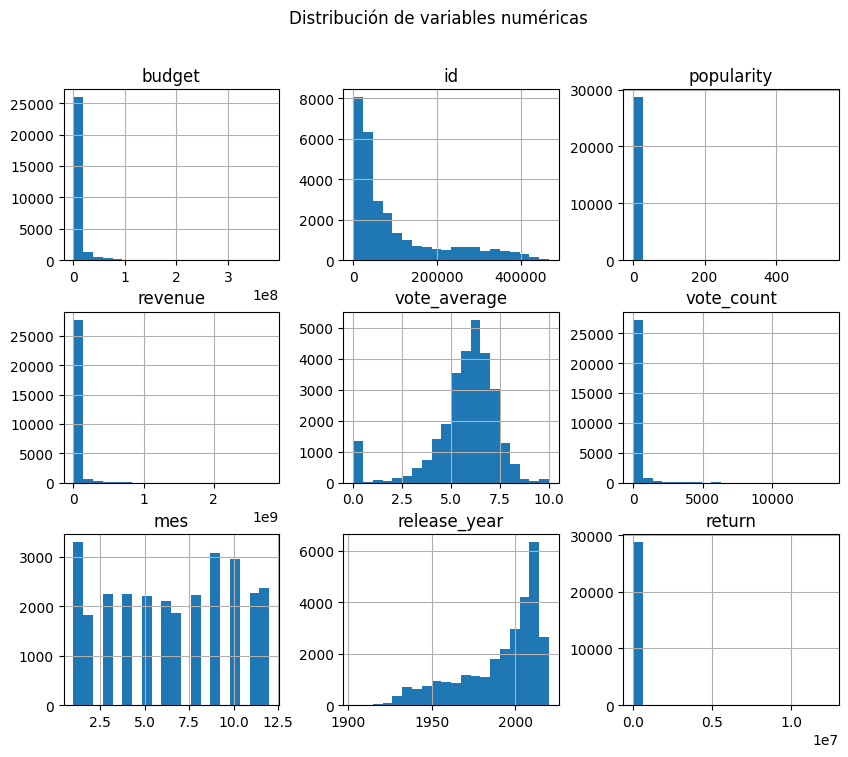

In [25]:
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribución de variables numéricas")
plt.show()


In [ ]:
#en caso de quere visualizar los diagrmas de caja ejecute este codigo
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

Ahora se realizara un analisis de correlacione entre variables numericas, esto permitira saber la relacion entre variables que podrian ser utilies para nuestro modelo de aprendizaje

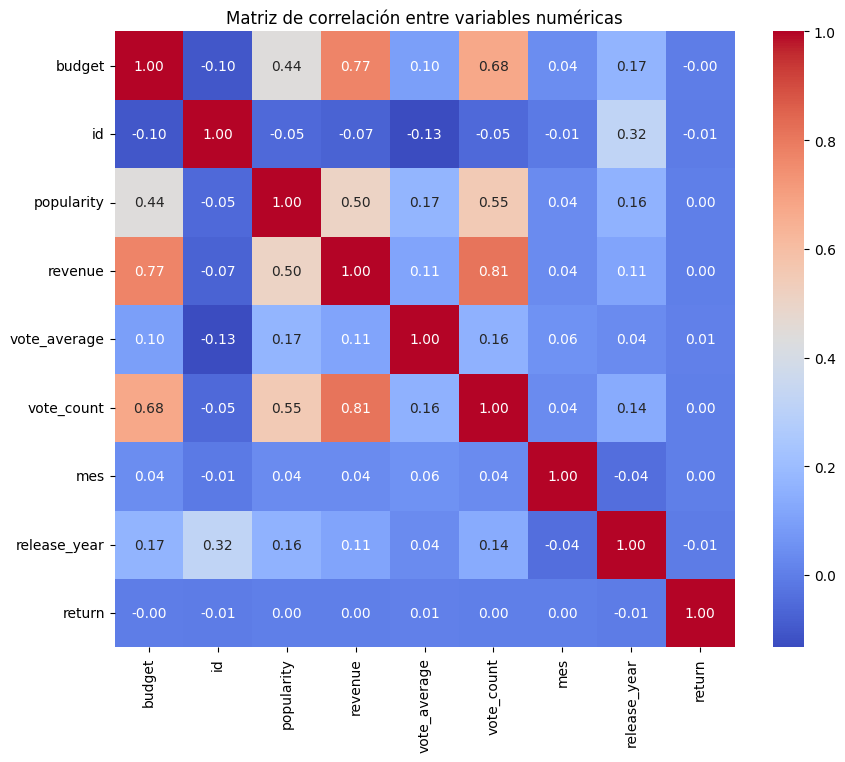

In [4]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Para finalizar este analisis se generan los diagramas de correlacion para determinar la relacion entre las variables numericas.

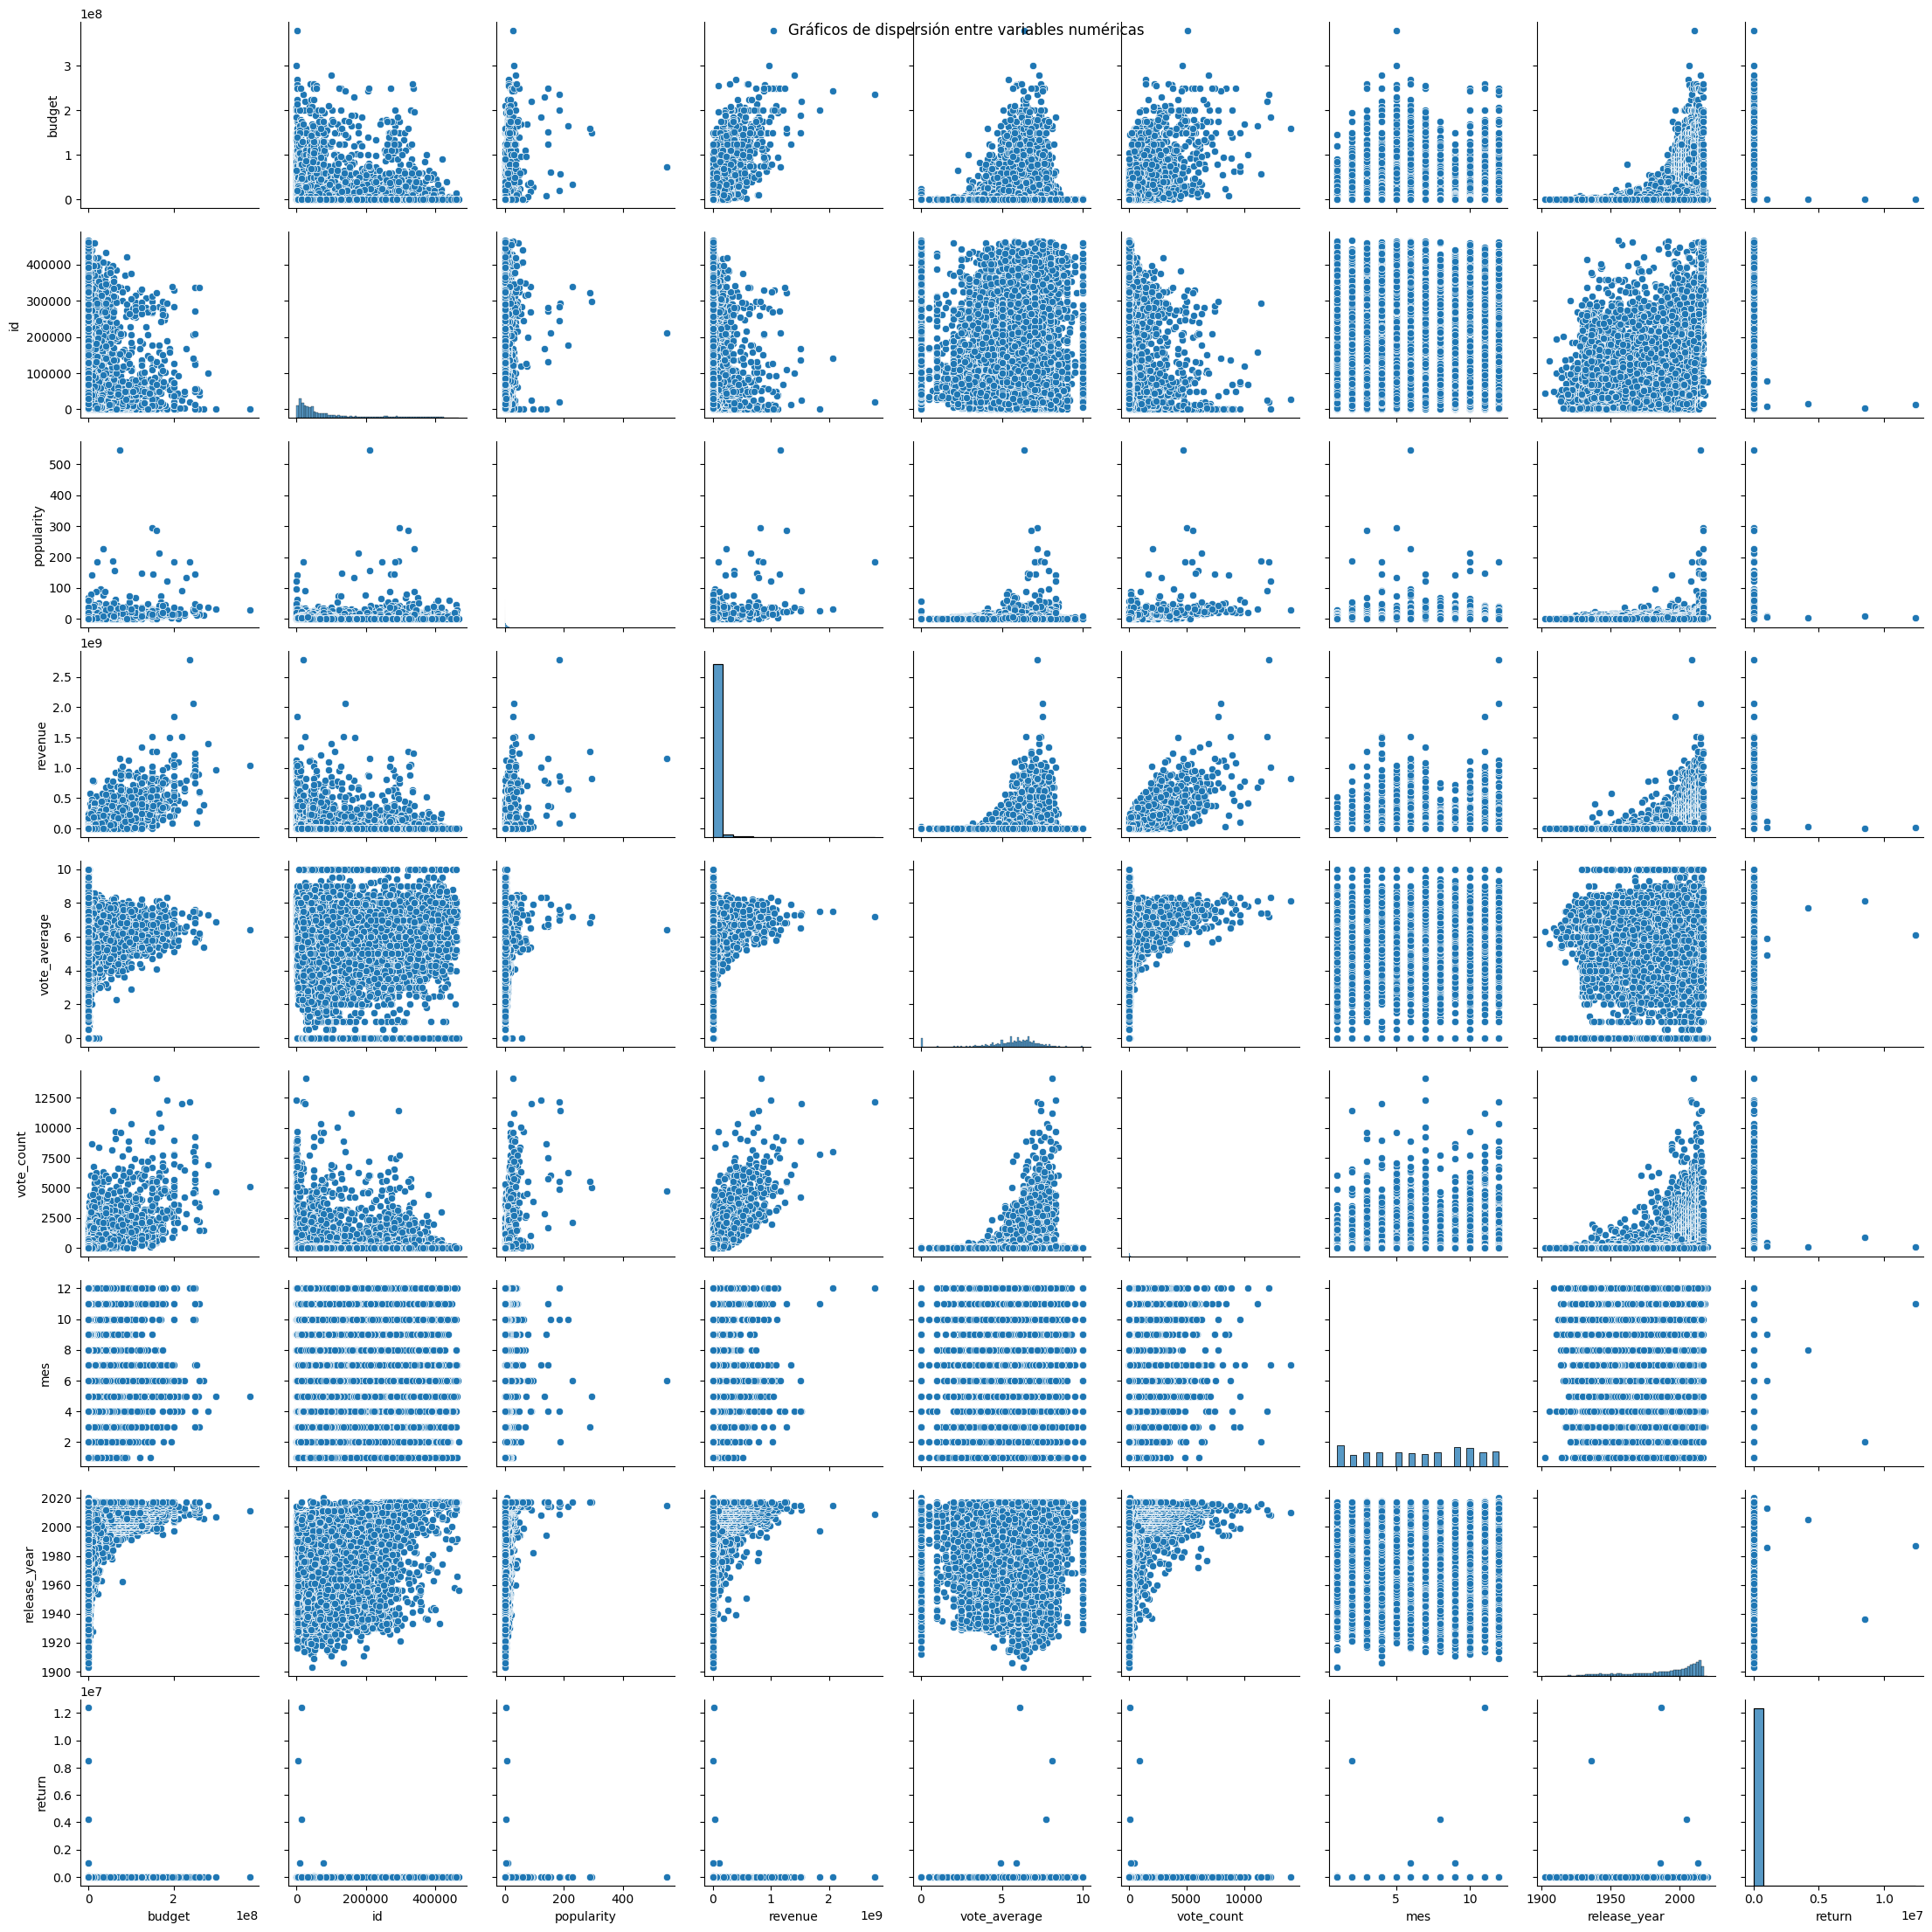

In [5]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Gráficos de dispersión entre variables numéricas")
plt.show()